In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt

In [3]:
root_path = '/content/drive/MyDrive/Colab Notebooks/ML LAB 10'
classes = os.listdir(root_path + '/Training')
print(classes)

['Orange', 'Banana', 'Apple Red 1']


In [4]:
train_dataset = ImageFolder(root_path + "/Training", transform=tt.ToTensor())
print(train_dataset)
test_dataset = ImageFolder(root_path + "/Test", transform=tt.ToTensor())
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 1461
    Root location: /content/drive/MyDrive/Colab Notebooks/ML LAB 10/Training
    StandardTransform
Transform: ToTensor()
Dataset ImageFolder
    Number of datapoints: 490
    Root location: /content/drive/MyDrive/Colab Notebooks/ML LAB 10/Test
    StandardTransform
Transform: ToTensor()


tensor(1)
{'Apple Red 1': 0, 'Banana': 1, 'Orange': 2}
Banana


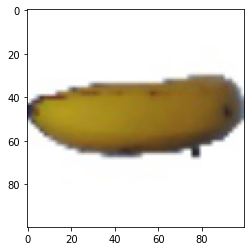

In [5]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
for images, labels in dataloader:
    print(labels[0])
    print(train_dataset.class_to_idx)
    print(train_dataset.classes[labels[0]])
    plt.imshow(images[0].permute(1, 2, 0))
    break

In [6]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        ######################################################################
        #### DESIGN LAYERS :
        ### SEQUENCE: CONV1,ACTIVATION1,POOLING1,  CONV2,ACTIVATION2,POOLING2, LINEAR(FC)
        self.layer1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2)
        self.layer2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        self.pool2 = nn.MaxPool2d(4)
        self.layer3 = nn.Linear(32 * 11 * 11, len(classes))

    def forward(self, x):
        # COMBINE LAYERS
        ## 1) CONV1
        out = self.layer1(x)

        ## 2) ACTIVATION1
        out = self.relu(out)

        ## 3) POOLING1
        out = self.pool1(out)

        ## 4) CONV2
        out = self.layer2(out)

        ## 5) ACTIVATION2
        out = self.relu(out)

        ## 6) POOLING2
        out = self.pool2(out)

        ## 7) flatten ########## DURING LAB WE JUST FORGOT FOLLOWING FLATTEN LAYER ###############
        out = out.view(out.size(0), -1)

        ## 8) LINEAR(FC)
        return self.layer3(out)

# batch_size, epoch and iteration
batch_size = 100
num_epochs = (len(train_dataset.samples) / batch_size)
num_epochs = int(num_epochs)

# data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Create CNN
model = CNNModel()

# Cross Entropy Loss
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for i, (images, labels) in enumerate(train_loader):

    train = images

    # Clear gradients
    optimizer.zero_grad()

    # Forward propagation
    outputs = model(train)

    # Calculate softmax and ross entropy loss
    loss = error(outputs, labels)

    # Calculating gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    count += 1

    if count % 10 == 0:
        # Calculate Accuracy
        correct = 0
        total = 0
        # Iterate through test dataset
        for images, labels in test_loader:
            test = images

            # Forward propagation
            outputs = model(test)

            # Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]

            # Total number of labels
            total += len(labels)

            correct += (predicted == labels).sum()

        accuracy = 100 * correct / float(total)

        # store loss and iteration
        loss_list.append(loss.data)
        iteration_list.append(count)
        accuracy_list.append(accuracy)
        print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 10  Loss: 1.059169054031372  Accuracy: 33.8775520324707 %
